In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tqdm import tqdm

In [2]:
# Load data
data = pd.DataFrame(columns=['jargon_proportion', 'score', 'num_comments', 'link_flair_text', 'year', 'month'])
for file in tqdm(os.listdir('../data/r_science_jargon_metrics/')):
    year = file.split('_')[2]
    month = file.split('_')[3].split('.')[0]
    df = pd.read_csv(f'../data/r_science_jargon_metrics/{file}')
    df = df[['jargon_proportion', 'score', 'num_comments', 'link_flair_text']]
    df.dropna(inplace=True)
    df["year"] = year
    df["month"] = month
    data = pd.concat([data, df])
# save to csv
#data.to_csv('../data/summed_for_regression.csv')
# 
        

  0%|          | 0/83 [00:00<?, ?it/s]/var/folders/mj/c1h2qjbd7xxbxxm05x_mmd580000gn/T/ipykernel_74199/3623335076.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, df])
100%|██████████| 83/83 [00:05<00:00, 16.56it/s]


In [3]:
data.head()


,jargon_proportion,score,num_comments,link_flair_text,year,month
0,0.176471,1,0.0,Psychology,2017,06
2,0.171429,39,7.0,Psychology,2017,06
4,0.000000,2,0.0,Nanoscience,2017,06
6,0.285714,1,0.0,Chemistry,2017,06
8,0.000000,1,1.0,Medicine,2017,06


In [14]:
data.corr()

,jargon_proportion,score,num_comments,year,month
jargon_proportion,1.000000,0.018308,0.016920,0.021668,0.006009
score,0.018308,1.000000,0.648986,0.052664,0.011895
num_comments,0.016920,0.648986,1.000000,0.047010,0.012083
year,0.021668,0.052664,0.047010,1.000000,0.009016
month,0.006009,0.011895,0.012083,0.009016,1.000000


In [18]:

model = ols("score ~ jargon_proportion", data=data)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     66.71
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           3.16e-16
Time:                        10:16:15   Log-Likelihood:            -2.0009e+06
No. Observations:              198977   AIC:                         4.002e+06
Df Residuals:                  198975   BIC:                         4.002e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           861.6893     17.85

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Psychology'),
  Text(1, 0, 'Nanoscience'),
  Text(2, 0, 'Chemistry'),
  Text(3, 0, 'Medicine'),
  Text(4, 0, 'Environment'),
  Text(5, 0, 'Health'),
  Text(6, 0, 'Physics'),
  Text(7, 0, 'Computer Science'),
  Text(8, 0, 'Anthropology'),
  Text(9, 0, 'Astronomy'),
  Text(10, 0, 'Social Science'),
  Text(11, 0, 'Biology'),
  Text(12, 0, 'Engineering'),
  Text(13, 0, 'Paleontology'),
  Text(14, 0, 'Animal Science'),
  Text(15, 0, 'Neuroscience'),
  Text(16, 0, 'Earth Science'),
  Text(17, 0, 'Cancer'),
  Text(18, 0, 'Mathematics'),
  Text(19, 0, 'Geology'),
  Text(20, 0, 'Epidemiology'),
  Text(21, 0, 'Computer Sci'),
  Text(22, 0, 'Economics'),
  Text(23, 0, 'Genetics'),
  Text(24, 0, 'Materials Science')])

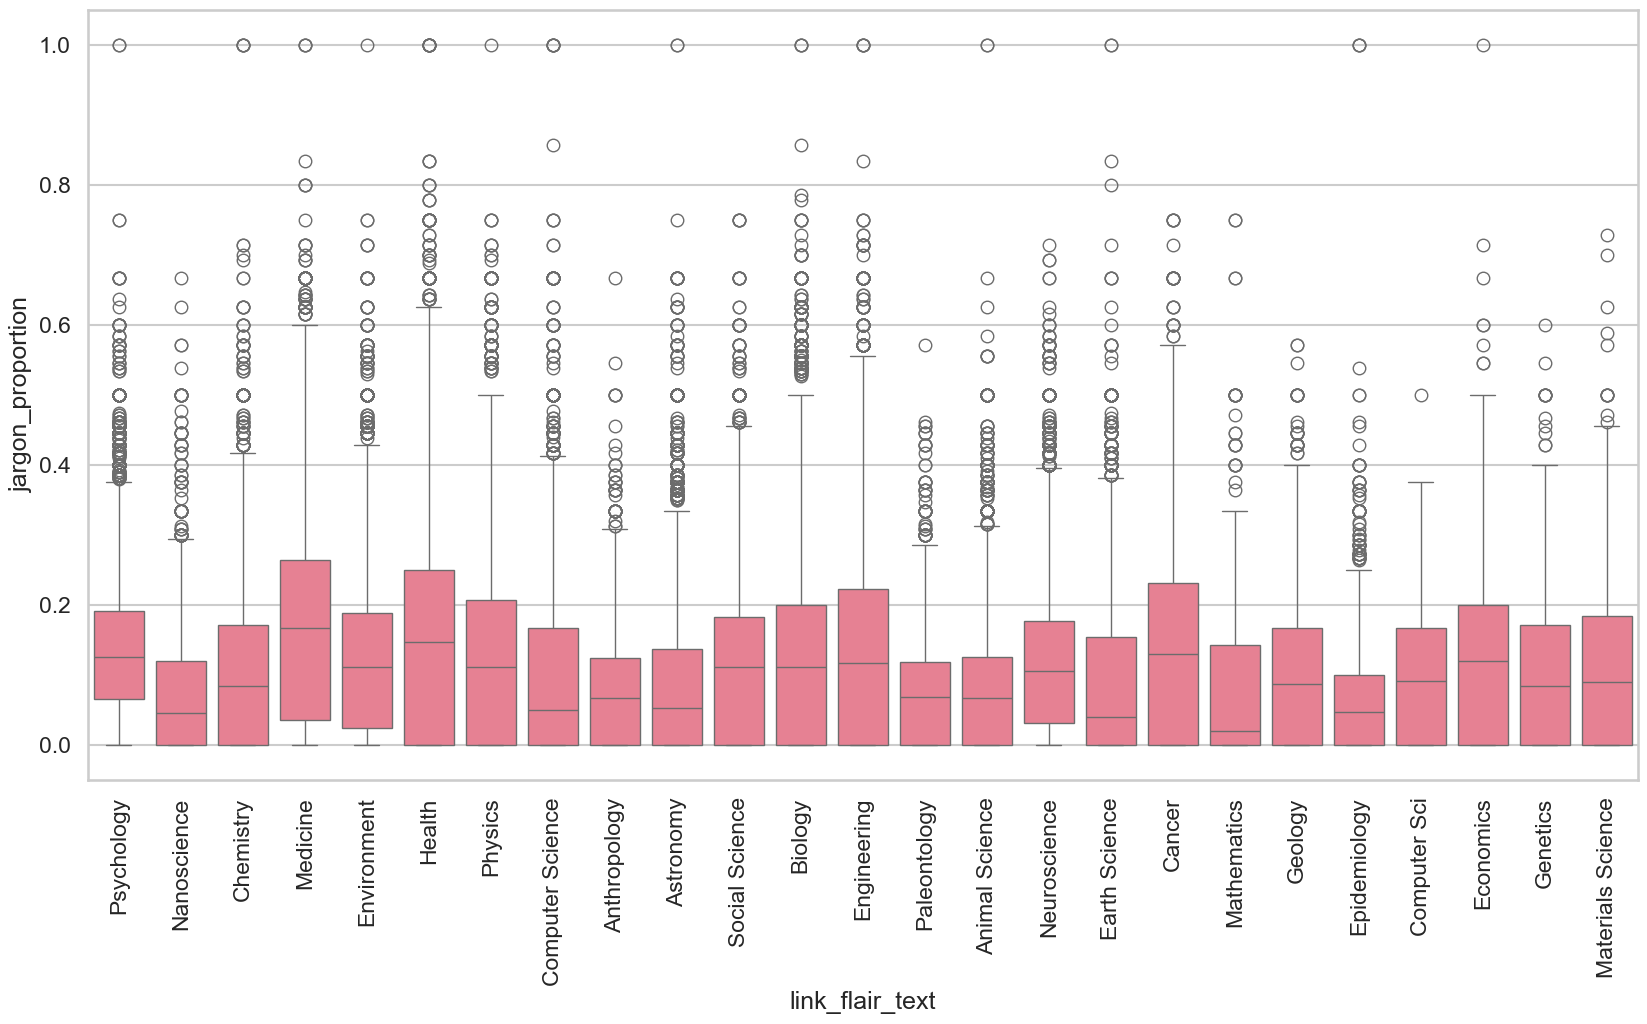

In [5]:
# seaborn plot of jargon measures over the categories 
sns.set(style="whitegrid")
sns.set_palette("husl")
sns.set_context("talk")
plt.figure(figsize=(20, 10))
sns.boxplot(x="link_flair_text", y="jargon_proportion", data=data)
plt.xticks(rotation=90)

In [7]:
conditions = [
    data['link_flair_text'].isin(["Biology", "Medicine", "Health", "Neuroscience", "Cancer", "Epidemiology", "Genetics", "Animal Science"]),
    data['link_flair_text'].isin(["Chemistry", "Physics", "Earth Science", "Geology", "Astronomy", "Nanoscience"]),
    data['link_flair_text'].isin(["Psychology", "Social Science", "Anthropology", "Economics"]),
    data['link_flair_text'].isin(["Computer Science", "Engineering", "Materials Science", "Mathematics"]),
    data['link_flair_text'].isin(["Environment", "Paleontology"])
]

choices = ["Life Sciences", "Physical Sciences", "Social Sciences", "Engineering & Technology", "Environmental Sciences"]

# Apply np.select to assign categories
data['top_category'] = np.select(conditions, choices, default="Other")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Social Sciences'),
  Text(1, 0, 'Physical Sciences'),
  Text(2, 0, 'Life Sciences'),
  Text(3, 0, 'Environmental Sciences'),
  Text(4, 0, 'Engineering & Technology'),
  Text(5, 0, 'Other')])

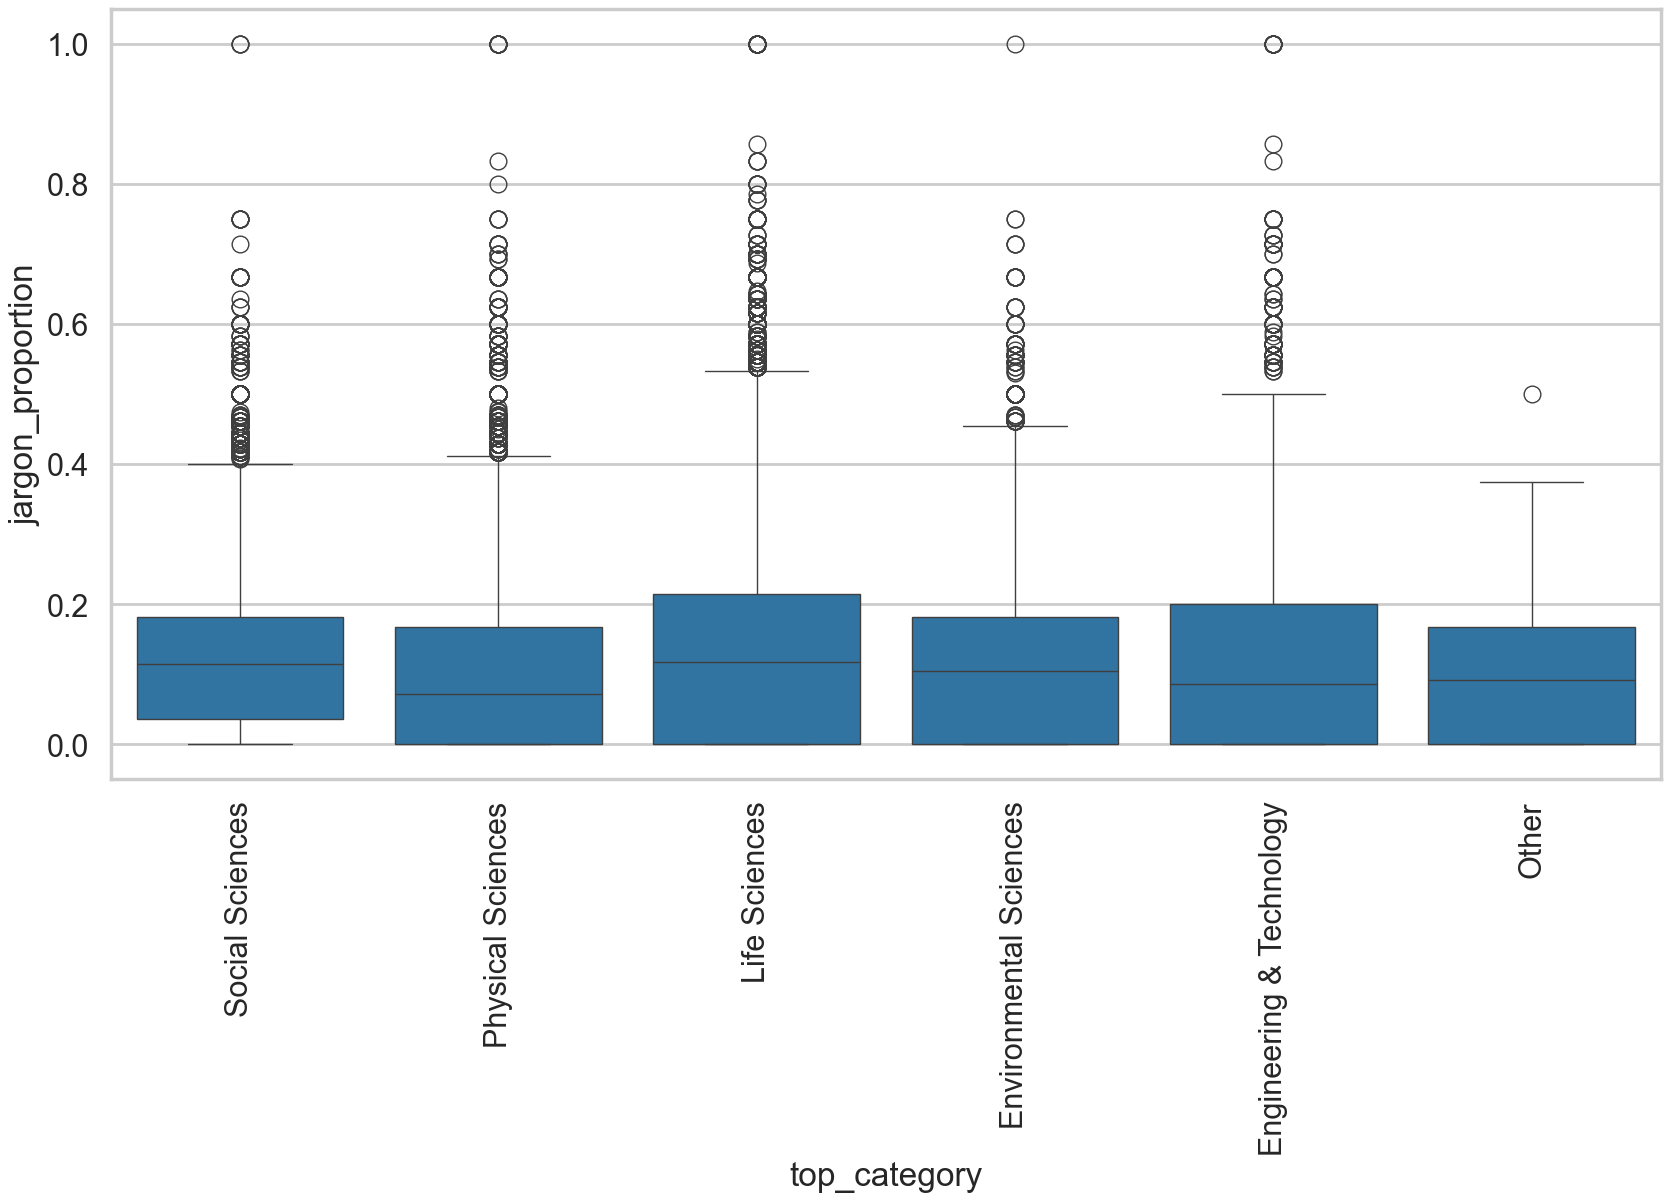

In [19]:
# seaborn plot of jargon measures over the categories 
sns.set(style="whitegrid")
sns.set_palette("tab10")
sns.set_context("poster")
plt.figure(figsize=(20, 10))
sns.boxplot(x="top_category", y="jargon_proportion", data=data)
plt.xticks(rotation=90)